# **Bigfoot Sightings Analysis**

In [1]:
# Import relevant libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

import folium 
from folium import plugins
from folium.plugins import HeatMap

import datetime
from datetime import date

In [2]:
# Load data onto a dataframe 

df = pd.read_csv('/kaggle/input/unlocking-mysteries-of-bigfoot-through-sightings/bfro_locations.csv')

In [3]:
# Sort based on timestamps

df = df.sort_values(by=['timestamp'])

In [4]:
# Quick glance at the data

df.head()

,index,number,title,classification,timestamp,latitude,longitude
213,213,14338,Report 14338: Old newspaper article (Titusvill...,Class A,1869-11-10T12:00:00Z,37.39555,-1.214871e+02
1525,1525,14358,Report 14358: Old newspaper article (Clearfiel...,Class A,1921-01-14T12:00:00Z,41.01865,-7.837700e+01
2963,2963,24413,Report 24413: Woman recounts a tale her Grandf...,Class B,1925-10-14T12:00:00Z,31.08774,-9.184467e+01
3680,3680,2477,Report 2477: Nine foot tall brown/black creatu...,Class B,1930-09-30T12:00:00Z,31.40444,-9.570861e+01
3139,3139,24102,Report 24102: Recollections of numerous encoun...,Class B,1932-01-01T12:00:00Z,39.80751,-9.486840e+07


In [5]:
# Convert timestamp to Year Time and Month

df['Date'] = pd.to_datetime(df['timestamp']).dt.date
df['Time'] = pd.to_datetime(df['timestamp']).dt.time
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

df.head()

,index,number,title,classification,timestamp,latitude,longitude,Date,Time,Year,Month
213,213,14338,Report 14338: Old newspaper article (Titusvill...,Class A,1869-11-10T12:00:00Z,37.39555,-1.214871e+02,1869-11-10,12:00:00,1869,11
1525,1525,14358,Report 14358: Old newspaper article (Clearfiel...,Class A,1921-01-14T12:00:00Z,41.01865,-7.837700e+01,1921-01-14,12:00:00,1921,1
2963,2963,24413,Report 24413: Woman recounts a tale her Grandf...,Class B,1925-10-14T12:00:00Z,31.08774,-9.184467e+01,1925-10-14,12:00:00,1925,10
3680,3680,2477,Report 2477: Nine foot tall brown/black creatu...,Class B,1930-09-30T12:00:00Z,31.40444,-9.570861e+01,1930-09-30,12:00:00,1930,9
3139,3139,24102,Report 24102: Recollections of numerous encoun...,Class B,1932-01-01T12:00:00Z,39.80751,-9.486840e+07,1932-01-01,12:00:00,1932,1


In [6]:
# Quick statistics on data

df.describe()

,index,number,latitude,longitude,Year,Month
count,4250.000000,4250.000000,4250.000000,4.250000e+03,4250.000000,4250.000000
mean,2124.500000,22586.533647,39.831850,-6.684490e+04,1998.971294,7.198824
std,1227.013651,19015.127478,6.009091,2.028967e+06,14.611518,3.081959
min,0.000000,60.000000,25.141000,-9.486840e+07,1869.000000,1.000000
25%,1062.250000,6923.750000,35.629365,-1.180889e+02,1990.000000,5.000000
50%,2124.500000,17230.500000,39.633185,-9.235350e+01,2003.000000,8.000000
75%,3186.750000,34236.000000,44.824168,-8.316599e+01,2009.000000,10.000000
max,4249.000000,71997.000000,64.891390,-6.383683e+01,2053.000000,12.000000


In [7]:
# Found random time stamp past our current year

max(df['timestamp'])

'2053-06-24T12:00:00Z'

In [8]:
# Eliminate entries from future

today = date.today()
print("Today's date:", today)
this_year = datetime.date.today().year
print('Current year:', this_year)

print('Removed following reports: ', df[df['Year'] > this_year]['title'])
df = df[df['Year'] < this_year]

Today's date: 2023-11-16
Current year: 2023
Removed following reports:  3277    Report 45647: Memory told of a possible encoun...
Name: title, dtype: object


In [9]:
# Another quick glance at data, shows us if there are any NaN and null values 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4249 entries, 213 to 760
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4249 non-null   int64  
 1   number          4249 non-null   int64  
 2   title           4249 non-null   object 
 3   classification  4249 non-null   object 
 4   timestamp       4249 non-null   object 
 5   latitude        4249 non-null   float64
 6   longitude       4249 non-null   float64
 7   Date            4249 non-null   object 
 8   Time            4249 non-null   object 
 9   Year            4249 non-null   int32  
 10  Month           4249 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(5)
memory usage: 365.1+ KB


## **Show the change in sightings reported from year to year**

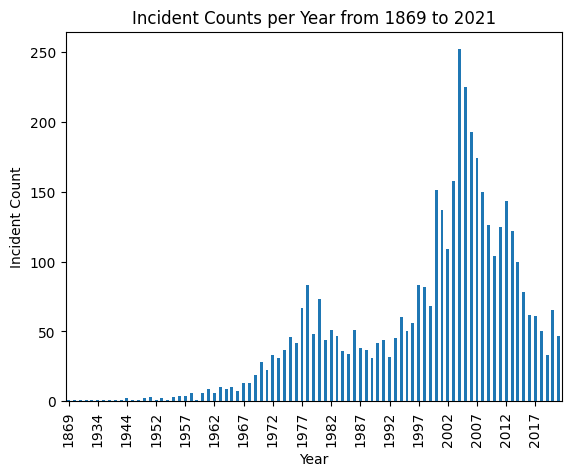

In [10]:
ax = df['Year'].value_counts().sort_index().plot(kind='bar')

# Show every 5th x-tick
X_TICKS = 5
plt.xticks(range(0, len(ax.get_xticklabels()), X_TICKS), 
           ax.get_xticklabels()[::X_TICKS], rotation = 90)
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.title('Incident Counts per Year from ' + str(min(df['Year'])) +
         ' to ' + str(max(df['Year'])))

plt.show()

 A spike in sighting reported in 2004

## **Show which month the most sightings happen**

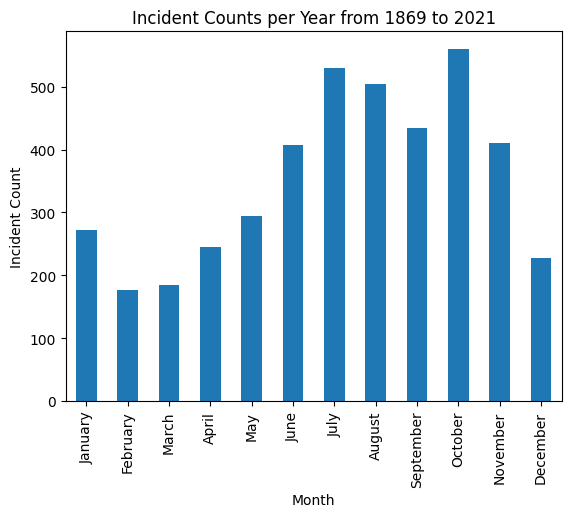

In [11]:
ax = df['Month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.title('Incident Counts per Year from ' + str(min(df['Year'])) +
         ' to ' + str(max(df['Year'])))
new_x_labels = [
    'January', 'February', 'March',
    'April', 'May', 'June',
    'July', 'August', 'September',
    'October', 'November', 'December'
]

ax.set_xticklabels(new_x_labels)

plt.show()

Octorber has the month with the highest reported sightings. Not entirely sure why, maybe because people are out during Halloween?

## **Heat map of where most sightings happen**

In [12]:
map = folium.Map(df[['latitude','longitude']].median().values.tolist(), 
                zoom_start=2)

HeatMap(data=df[['latitude','longitude']].groupby([
    'latitude','longitude']).sum().reset_index().values.tolist(), 
        radius=7, max_zoom=10).add_to(map)
map

The majority of sightings being in the pacific northwest makes sense